In [6]:
import seaborn as sns
import pandas as pd

In [7]:
tips  = sns.load_dataset('tips')

In [9]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# How many week days are present in the dataset?

In [10]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

# How many dinners and lunch are present?

In [19]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

# Chart on dinner and lunch

<AxesSubplot:>

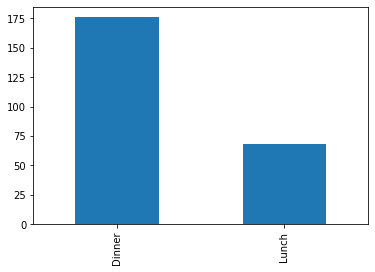

In [24]:
tips.time.value_counts().plot(kind='bar')

# Proportion of dinner and lunch in %?

In [25]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

# When does people gives more tips (Dinner or Lunch)?

In [26]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

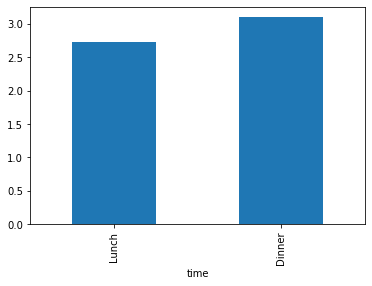

In [31]:
tips.groupby(['time'])['tip'].mean().plot.bar()

# Average Tips (Smoker and Non Smoker)

In [32]:
tips.groupby(['smoker'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

<AxesSubplot:xlabel='smoker'>

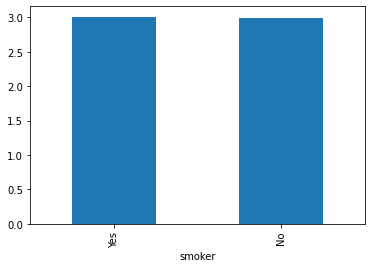

In [33]:
tips.groupby(['smoker'])['tip'].mean().plot.bar()

# Average tip by Sex

In [35]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [37]:
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

# Average tip by Size

In [38]:
tips.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

<AxesSubplot:xlabel='size'>

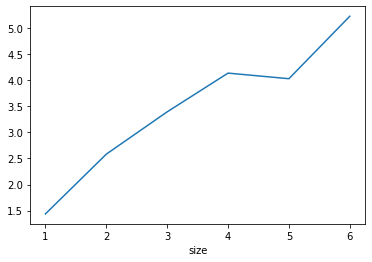

In [39]:
tips.groupby(['size'])['tip'].mean().plot()

# Smoker And Non smoker tips according to sex

In [49]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


# New Column: % of tip compare to total bill

In [52]:
tips['tip_pct']= (tips.tip / tips.total_bill)*100

In [53]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


# Relationship between tips and total bill

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

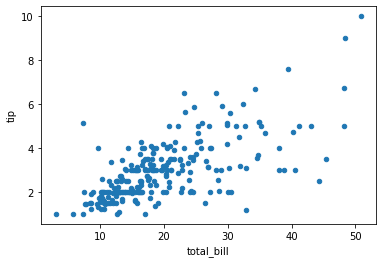

In [54]:
#Panda
tips.plot.scatter(x='total_bill',y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

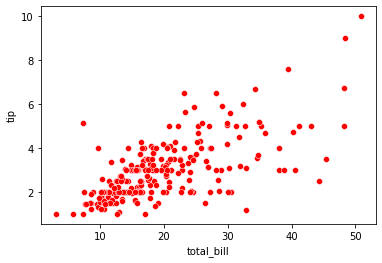

In [61]:
#Seaborn
sns.scatterplot(x='total_bill',y='tip',data=tips,color='red')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

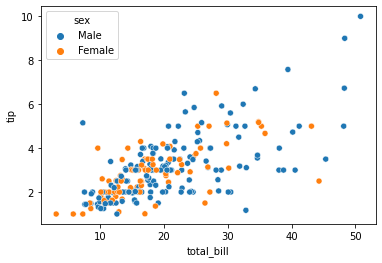

In [64]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

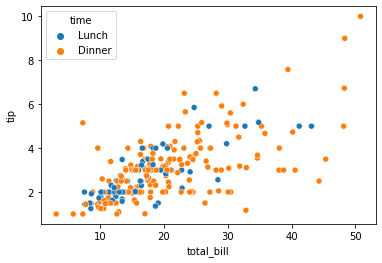

In [65]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='time')

# Creatig bifurcation on time on the chart above based on column sex 

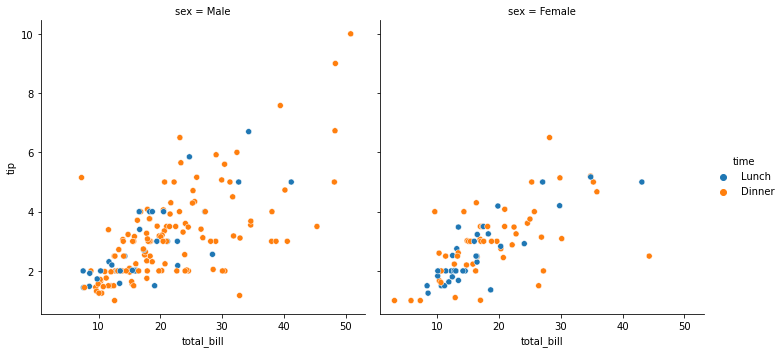

In [66]:
#split

sns.relplot(x='total_bill',y='tip',data=tips,hue='time',col='sex')

# Distribution of total bill by time

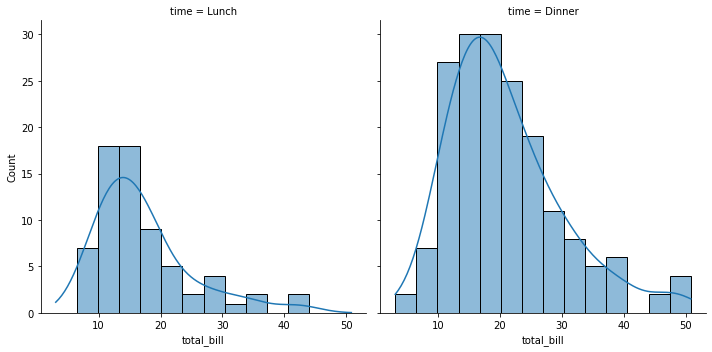

In [68]:
# Dis plot = distributio plot

sns.displot(data=tips,x='total_bill',col='time',kde=True)

# Creating Corelation and distribution for all numeric variables by sex

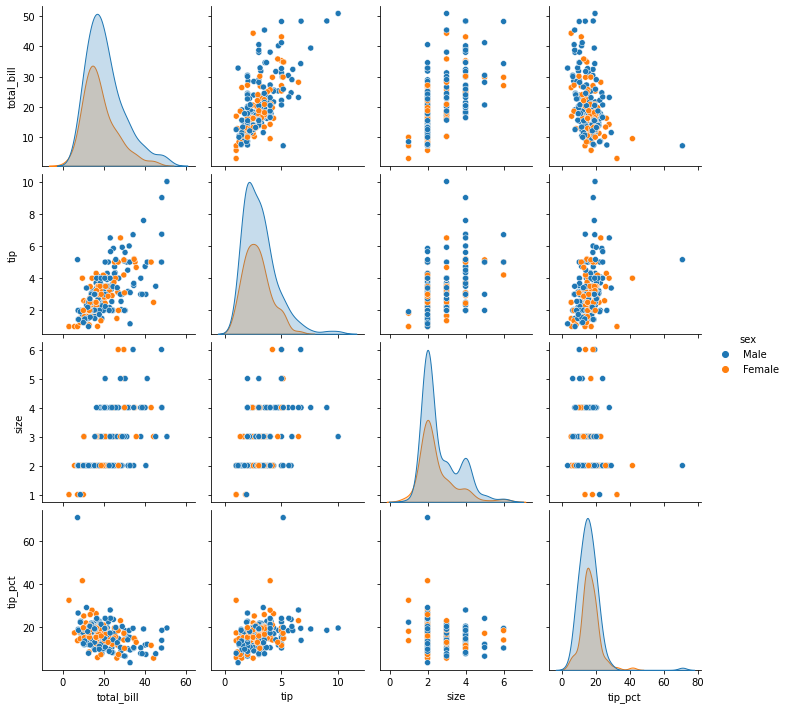

In [69]:
sns.pairplot(data=tips,hue='sex')